<a href="https://colab.research.google.com/github/Inamul-Hassan/Basic-Recommendation-System/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Resume Projects/Datasets/imdb_raw.csv")

## Basic Exploration

In [3]:
data.head()

Movie Name  ...                                        Description
0                          Les évadés  ...  Two imprisoned men bond over a number of years...
1  The Dark Knight: Le chevalier noir  ...  When the menace known as the Joker wreaks havo...
2                           Inception  ...  A thief who steals corporate secrets through t...
3                          Fight Club  ...  An insomniac office worker and a devil-may-car...
4                        Pulp Fiction  ...  The lives of two mob hitmen, a boxer, a gangst...

[5 rows x 14 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189900 entries, 0 to 189899
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Movie Name           189900 non-null  object 
 1   Movie Date           189895 non-null  float64
 2   Serie Name           65901 non-null   object 
 3   Serie Date           65899 non-null   object 
 4   Movie Type           189900 non-null  object 
 5   Number of Votes      189900 non-null  int64  
 6   Movie Revenue (M$)   18946 non-null   float64
 7   Score                189900 non-null  float64
 8   Metascore            18527 non-null   float64
 9   Time Duration (min)  179389 non-null  float64
 10  Director             189900 non-null  object 
 11  Actors               189900 non-null  object 
 12  Restriction          82260 non-null   object 
 13  Description          189900 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 20.3+ MB


In [5]:
data.isna().sum()

Movie Name                  0
Movie Date                  5
Serie Name             123999
Serie Date             124001
Movie Type                  0
Number of Votes             0
Movie Revenue (M$)     170954
Score                       0
Metascore              171373
Time Duration (min)     10511
Director                    0
Actors                      0
Restriction            107640
Description                 0
dtype: int64

## Exploratory Data Analysis

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [6]:
from pandas_profiling import ProfileReport

In [7]:
profile = ProfileReport(data,title="IMDB Pandas Profiling Report")

In [8]:
profile.to_file(output_file="IMDB Pandas Profiling Report.html")

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile.to_notebook_iframe()

## Exploration

### Correlation

In [4]:
data.corr()

Movie Date  ...  Time Duration (min)
Movie Date             1.000000  ...            -0.015603
Number of Votes        0.008276  ...             0.318537
Movie Revenue (M$)     0.120125  ...             0.524082
Score                  0.060900  ...            -0.179318
Metascore             -0.266548  ...             0.480997
Time Duration (min)   -0.015603  ...             1.000000

[6 rows x 6 columns]

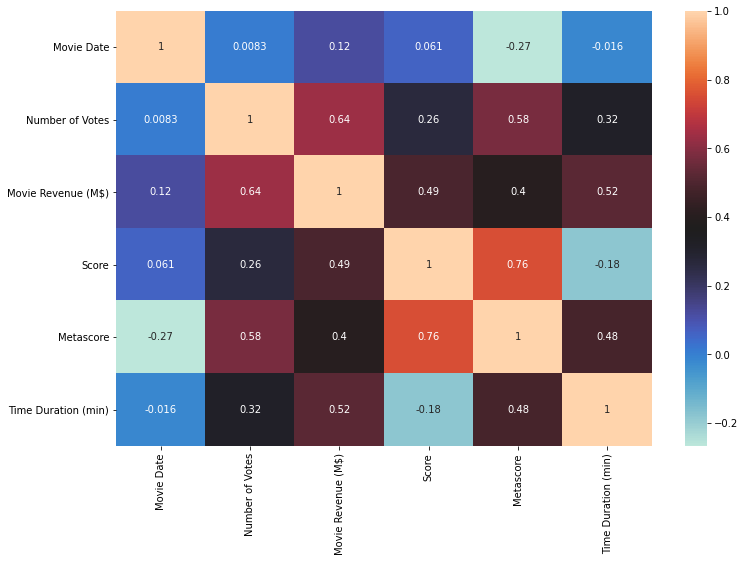

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='icefire')

## Preprocessing


### Movies and Series

This datasets contaion information about the movies and sereies. While building recommendation system we cant recommend a series based on a movie name or the vice versa. So we have to seperate the series data from movies.

### Seperating Series from the data

In [6]:
data['Serie Name'].notnull().sum()

65901

In [7]:
# Selecting only the rows where the serie name is not null

data[data['Serie Name'].notnull()]

Movie Name  ...                                        Description
9958     Love, Death & Robots  ...  A community of farmers use their homemade mech...
9959                     Dark  ...  The small German town of Winden is shaken by t...
9988            Rick et Morty  ...  Rick provides the family with a solution to th...
10007                    Dark  ...  Armed with a plan to prevent the apocalypse, J...
10009    L'attaque des titans  ...  While one front is rained on by flames, the ot...
...                       ...  ...                                                ...
189892       Private Practice  ...  Charlotte and Cooper look to forgive each othe...
189893       Private Practice  ...  After tragedy strikes the Montgomery family, A...
189896    Saturday Night Live  ...  America's premiere sketch-comedy show returns ...
189898      Dragon Ball Z Kai  ...      A Full Powered Super Saiyan Goku fights Cell.
189899     L'Heure de la peur  ...  Tensions run high when a family receives a mys...

[65901 rows x 14 columns]

In [8]:
# Creating a new data frame with the series data

dataSeries = pd.DataFrame(data[data['Serie Name'].notnull()])

In [9]:
# reseting the index of series data
dataSeries.reset_index(inplace=True)

In [10]:
dataSeries

index  ...                                        Description
0        9958  ...  A community of farmers use their homemade mech...
1        9959  ...  The small German town of Winden is shaken by t...
2        9988  ...  Rick provides the family with a solution to th...
3       10007  ...  Armed with a plan to prevent the apocalypse, J...
4       10009  ...  While one front is rained on by flames, the ot...
...       ...  ...                                                ...
65896  189892  ...  Charlotte and Cooper look to forgive each othe...
65897  189893  ...  After tragedy strikes the Montgomery family, A...
65898  189896  ...  America's premiere sketch-comedy show returns ...
65899  189898  ...      A Full Powered Super Saiyan Goku fights Cell.
65900  189899  ...  Tensions run high when a family receives a mys...

[65901 rows x 15 columns]

In [11]:
# Getting index of all the rows containg series
data[data['Serie Name'].notnull()].index

Int64Index([  9958,   9959,   9988,  10007,  10009,  10026,  10039,  10048,
             10049,  10102,
            ...
            189882, 189885, 189886, 189889, 189891, 189892, 189893, 189896,
            189898, 189899],
           dtype='int64', length=65901)

In [12]:
# Deleting the series data from our main dataset
data.drop(index=data[data['Serie Name'].notnull()].index,inplace=True)

In [13]:
# reseting the index of our movie dataset
data.reset_index(inplace=True)

In [14]:
data.drop('index',axis=1,inplace=True)

In [15]:
data

Movie Name  ...                                        Description
0                                              Les évadés  ...  Two imprisoned men bond over a number of years...
1                      The Dark Knight: Le chevalier noir  ...  When the menace known as the Joker wreaks havo...
2                                               Inception  ...  A thief who steals corporate secrets through t...
3                                              Fight Club  ...  An insomniac office worker and a devil-may-car...
4                                            Pulp Fiction  ...  The lives of two mob hitmen, a boxer, a gangst...
...                                                   ...  ...                                                ...
123994  Steve Coogan Live: As Alan Partridge and Other...  ...  Steve Coogan takes to the stage in his first s...
123995                         Out of the Wild: Venezuela  ...  Armed With Only Basic Supplies, Nine Strangers...
123996                                            Sadie J  ...  Sadie, an exuberant British teenager, navigate...
123997                              Paraísos artificiales  ...  Luisa is 25 years old and fighting a heroin ad...
123998                                     Genius on Hold  ...  The story of Walter L. Shaw, a telecommunicati...

[123999 rows x 14 columns]

In [16]:
123998 + 65900

189898

### Checking for duplicates in our movies data

In [17]:
data['Movie Name'].duplicated().sum()

20161

In [18]:
# Saving the duplicated data in seperate data frame, incase we need it in the future

duplicates = data[data['Movie Name'].duplicated()]

In [19]:
duplicates.reset_index(inplace=True)

In [20]:
# Deleting the rows containing duplicate data

data.drop(index=data[data['Movie Name'].duplicated()].index,axis=0,inplace=True)

In [21]:
data.reset_index(inplace=True)

In [22]:
data

index  ...                                        Description
0            0  ...  Two imprisoned men bond over a number of years...
1            1  ...  When the menace known as the Joker wreaks havo...
2            2  ...  A thief who steals corporate secrets through t...
3            3  ...  An insomniac office worker and a devil-may-car...
4            4  ...  The lives of two mob hitmen, a boxer, a gangst...
...        ...  ...                                                ...
103833  123992  ...  A reporter named Tintin must help Captain Hadd...
103834  123994  ...  Steve Coogan takes to the stage in his first s...
103835  123995  ...  Armed With Only Basic Supplies, Nine Strangers...
103836  123996  ...  Sadie, an exuberant British teenager, navigate...
103837  123997  ...  Luisa is 25 years old and fighting a heroin ad...

[103838 rows x 15 columns]

In [23]:
data.drop('index',axis=1,inplace=True)

### Selecting Feature For Recommendation System

In [24]:
data['Director']

0            ['Frank Darabont']
1         ['Christopher Nolan']
2         ['Christopher Nolan']
3             ['David Fincher']
4         ['Quentin Tarantino']
                  ...          
103833     ['Jacques Exertier']
103834          ['Mick Thomas']
103835                       []
103836                       []
103837      ['Yulene Olaizola']
Name: Director, Length: 103838, dtype: object

In [25]:
data['Actors']

0         ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...
1         ['Christian Bale', 'Heath Ledger', 'Aaron Eckh...
2         ['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...
3         ['Brad Pitt', 'Edward Norton', 'Meat Loaf', 'Z...
4         ['John Travolta', 'Uma Thurman', 'Samuel L. Ja...
                                ...                        
103833    ['Ewan Bailey', 'James Barriscale', 'Mark Baze...
103834    ['Steve Coogan', 'Alice Lowe', 'Flik Swan', 'S...
103835                                                   []
103836    ['Georgia Lock', 'Mel Giedroyc', 'Bobby Fuller...
103837    ['Luisa Pardo', 'Salomón Hernández', 'Juan J. ...
Name: Actors, Length: 103838, dtype: object

In [26]:
data['Movie Type']

0                                    ['Drama']
1                 ['Action', 'Crime', 'Drama']
2            ['Action', 'Adventure', 'Sci-Fi']
3                                    ['Drama']
4                           ['Crime', 'Drama']
                          ...                 
103833    ['Animation', 'Action', 'Adventure']
103834               ['Documentary', 'Comedy']
103835                          ['Reality-TV']
103836                              ['Comedy']
103837                               ['Drama']
Name: Movie Type, Length: 103838, dtype: object

In [27]:
data['Description'].iloc[2]

'A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.'

**INFERENCE**

We will build 2 recommendation system.

First recommendation system will use director name, genre and actor name to recommend similar movies. Additionally we can sort the selected movies based on the score.

Second recommendation system will use the description the movie to recommend movies with similar plot.

I have selected 5 features from our dataset to make the recommendation system. So there is no need to worry about other features.

### Missing values

In [28]:
data[['Movie Name','Movie Type','Score','Director','Actors','Description']].isna().sum()

Movie Name     0
Movie Type     0
Score          0
Director       0
Actors         0
Description    0
dtype: int64

**INFERENCE**

We dont have any missing value in the selected features.

### Cleaning Data

#### Director

In [29]:
data['Director']

0            ['Frank Darabont']
1         ['Christopher Nolan']
2         ['Christopher Nolan']
3             ['David Fincher']
4         ['Quentin Tarantino']
                  ...          
103833     ['Jacques Exertier']
103834          ['Mick Thomas']
103835                       []
103836                       []
103837      ['Yulene Olaizola']
Name: Director, Length: 103838, dtype: object

In [30]:
# We have to remove the brackets

In [31]:
data['Director'].iloc[0].split("'")[1::2]

['Frank Darabont']

In [32]:
def Cleaner(column):
  '''
  This function accepts a column.
  And it removes the square bracket from each row of the column.
  '''
  data[column] = data[column].apply(lambda word:word.split("'")[1::2])

In [33]:
Cleaner('Director')

In [34]:
data['Director']

0            [Frank Darabont]
1         [Christopher Nolan]
2         [Christopher Nolan]
3             [David Fincher]
4         [Quentin Tarantino]
                 ...         
103833     [Jacques Exertier]
103834          [Mick Thomas]
103835                     []
103836                     []
103837      [Yulene Olaizola]
Name: Director, Length: 103838, dtype: object

In [35]:
emptyIndex = data[data['Director'].apply(lambda x : not(bool(x)))].index

In [36]:
emptyIndex

Int64Index([     6,     15,     56,     58,     72,     74,     90,    100,
               101,    112,
            ...
            103800, 103808, 103809, 103812, 103821, 103823, 103829, 103832,
            103835, 103836],
           dtype='int64', length=16147)

In [37]:
data.drop(index=emptyIndex,inplace=True)

In [38]:
data.reset_index(inplace=True)

In [39]:
data.drop('index',axis=1,inplace=True)

#### Actor

In [40]:
def CleanerActor(column):
  '''
  This function accepts a column.
  And it removes the square bracket from each row of the column.
  '''
  data[column] = data[column].apply(lambda word:word.split("'")[1:5:2])

In [41]:
CleanerActor('Actors')

In [42]:
data['Actors']

0                      [Tim Robbins, Morgan Freeman]
1                     [Christian Bale, Heath Ledger]
2          [Leonardo DiCaprio, Joseph Gordon-Levitt]
3                         [Brad Pitt, Edward Norton]
4                       [John Travolta, Uma Thurman]
                            ...                     
87686             [Shaheizy Sam, Mohd Syafie Naswip]
87687    [Mikhail Porechenkov, Yekaterina Vasilyeva]
87688                [Ewan Bailey, James Barriscale]
87689                     [Steve Coogan, Alice Lowe]
87690               [Luisa Pardo, Salomón Hernández]
Name: Actors, Length: 87691, dtype: object

#### Movie Type (Genre)

In [43]:
Cleaner('Movie Type')

In [44]:
data['Movie Type']

0                               [Drama]
1                [Action, Crime, Drama]
2           [Action, Adventure, Sci-Fi]
3                               [Drama]
4                        [Crime, Drama]
                      ...              
87686                   [Action, Drama]
87687                   [Comedy, Drama]
87688    [Animation, Action, Adventure]
87689             [Documentary, Comedy]
87690                           [Drama]
Name: Movie Type, Length: 87691, dtype: object

In [45]:
data

Movie Name  ...                                        Description
0                                             Les évadés  ...  Two imprisoned men bond over a number of years...
1                     The Dark Knight: Le chevalier noir  ...  When the menace known as the Joker wreaks havo...
2                                              Inception  ...  A thief who steals corporate secrets through t...
3                                             Fight Club  ...  An insomniac office worker and a devil-may-car...
4                                           Pulp Fiction  ...  The lives of two mob hitmen, a boxer, a gangst...
...                                                  ...  ...                                                ...
87686                                            Songlap  ...  Brothers Ad and Am's lives are turned upside d...
87687                                            Marafon  ...  Tolik didn't succeed in life, sports career di...
87688  The Adventures of Tintin: The Secret of the Un...  ...  A reporter named Tintin must help Captain Hadd...
87689  Steve Coogan Live: As Alan Partridge and Other...  ...  Steve Coogan takes to the stage in his first s...
87690                              Paraísos artificiales  ...  Luisa is 25 years old and fighting a heroin ad...

[87691 rows x 14 columns]

## Recommendation based on movie detials

In [46]:
dataT = data.iloc[:1000]

In [48]:
dataT['word_pool'] = dataT['Director'] + dataT['Actors'] + dataT['Movie Type']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
type(dataT['word_pool'].iloc[21])

list

In [50]:
dataT['word_pool'] = dataT['word_pool'].apply(lambda word : " ".join(word))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
type(dataT['word_pool'].iloc[21])

str

In [91]:
dataT['word_pool'][62]

'George A. Romero Lane Carroll Will MacMillan Action Horror Sci-Fi'

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(ngram_range=(1, 2),stop_words='english',min_df=0)
count_matrix = count.fit_transform(dataT['word_pool'])

In [95]:
x = pd.concat([dataT['Score'],dataT['index']])

In [97]:
indices = pd.Series(dataT.index, index=dataT['Movie Name'])

In [98]:
indices

Movie Name
Les évadés                              0
The Dark Knight: Le chevalier noir      1
Inception                               2
Fight Club                              3
Pulp Fiction                            4
                                     ... 
Una                                   995
Kid Cannabis                          996
Gönül yarasi, blessures du coeur      997
Chienne de vie                        998
Kad porastem bicu Kengur              999
Length: 1000, dtype: int64

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations_by_movie_info(title):
    
    idx = indices[title]

    cosine_simi = cosine_similarity(count_matrix, count_matrix)

    simi_scores = list(enumerate(cosine_simi[idx]))

    simi_scores = sorted(simi_scores, key=lambda x: x[1], reverse=True)

    simi_scores = simi_scores[1:21]

    movie_indices = [i[0] for i in simi_scores]

    # Return the top 20 most similar movies
    return dataT['Movie Name'].iloc[movie_indices]

In [182]:
names = get_recommendations_by_movie_info('Captain America')

In [183]:
def output(names):
  s = []
  for i in names.index:
    s.append(dataT['Score'].iloc[i])
  return s

In [184]:
x = output(names)

In [185]:
x = pd.DataFrame(x)

In [186]:
n = pd.DataFrame(names)

In [187]:
n.reset_index(inplace=True)

In [188]:
final = pd.concat((x,n),axis=1)

In [189]:
final.sort_values(by=(0),ascending=False)

0  index                                      Movie Name
2   8.8      2                                       Inception
17  8.8    828                            Halo: Combat Evolved
7   8.6     11                                    Interstellar
8   8.5     33                            Retour vers le futur
5   8.5     43              Terminator 2 : Le Jugement dernier
9   8.2     37                                 V pour vendetta
3   8.0     17                                        Avengers
0   7.6     50                            Le cinquième élément
19  7.5    972          Dragon Ball Z: Broly le super guerrier
1   6.4    347                                    The returner
4   6.3    609                                    Le 7ème sens
13  6.2    407                               Gentlemen Broncos
6   6.1     62                        La nuit des fous vivants
11  5.9    318                     Starship Troopers: Invasion
12  5.7    382                                       Beta Test
16  5.7    804  The Man Who Killed Hitler and Then the Bigfoot
14  5.4    641             M.A.L., mutant aquatique en liberté
10  5.0    119                                        Invaders
18  4.5    911                                  Space Commando
15  4.4    672                                        400 Days

### Description

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer(stop_words='english')

tfidfv_matrix = tfidfv.fit_transform(dataT['Description'])

tfidfv_matrix.shape

(1000, 5561)

In [176]:
from sklearn.metrics.pairwise import linear_kernel

cosine_simi = linear_kernel(tfidfv_matrix, tfidfv_matrix)

In [177]:
# Fucntion To get recommendations
def get_recommendations_by_story(title, cosine_simi = cosine_simi):
    idx = indices[title]

    simi_scores = list(enumerate(cosine_simi[idx]))

    simi_scores = sorted(simi_scores, key=lambda x: x[1], reverse=True)

    simi_scores = simi_scores[1:11]

    movie_indices = [i[0] for i in simi_scores]

    return dataT['Movie Name'].iloc[movie_indices]

In [181]:
get_recommendations_by_story('Captain America')

388                      The Red Pill
230            Waiting for 'Superman'
748              Dead Space: Downfall
69     The Elder Scrolls IV: Oblivion
542              Au revoir Mr. Chips!
812                             Bully
14                   Django Unchained
211               La forteresse noire
508    House II: la deuxième histoire
318       Starship Troopers: Invasion
Name: Movie Name, dtype: object